<a href="https://colab.research.google.com/github/Vijaymax55/Text_extraction/blob/main/ML_project_Health_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #for manupulation of data fram 
import numpy as np # mathmatical operation
import plotly.express as px #produces easy-to-style figures, to visualize a variety of types of data.
import matplotlib  #for plotation
import matplotlib.pyplot as plt
import seaborn as sns ## seaborn is used for visualization
%matplotlib inline
import warnings ## used to remove warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split # split data
# modeling
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn import metrics
import missingno as msno
# export model 
import pickle

Load data

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ML Project: Health Insurance Cost Prediction/insurance.csv")

In [ ]:
df  ## display data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Exploratory Data Analysis

In [ ]:
df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
df.tail(15)

,age,sex,bmi,children,smoker,region,charges
1323,42,female,40.370,2,yes,southeast,43896.37630
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1326,42,female,32.870,0,no,northeast,7050.02130
1327,51,male,30.030,1,no,southeast,9377.90470
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500


In [ ]:
df.isnull().sum() ## to check null value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.select_dtypes(include=['object','category']).columns.tolist() # List Quanlitative (Categories)

['sex', 'smoker', 'region']

In [ ]:
df.select_dtypes(exclude=['object','category']).columns.tolist() ##List Qualitative (Numberical)

['age', 'bmi', 'children', 'charges']

Machine Learning Problem is Regression problem /n

Algorithm should to apply is Linear Regression

In [ ]:
df.describe() ##to show statical measure for data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##Data Visualization
*Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

*We'll use libraries Matplotlib, Seaborn and Plotly for visualization.

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
fig = px.histogram(df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [ ]:
fig = px.histogram(df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df, 
                   x='charges',
                   marginal='box',
                   color='smoker', 
                   color_discrete_sequence=['red', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Visualization of the distribution of medical charges in connection with other factors like "sex" and "region".

In [ ]:
fig = px.histogram(df,
                   x = 'charges',
                   color = 'sex',
                   color_discrete_sequence = ["blue","red"],
                   title = 'Different charges over genders'
)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df,
                  x = "charges",
                  marginal = 'box', 
                   color="region",
                  title = "charges over different regions of U.S.A")
fig.update_layout(bargap=0.1)
fig.show()

##Smoker

Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [ ]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
px.histogram(df, x='smoker', color='sex', title='Smoker')

##Age and Charges
Let's visualize the relationship between "age" and "charges" using a scatter plot.

In [ ]:
fig = px.scatter(df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

##BMI and Charges
Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot.

In [ ]:
fig = px.scatter(df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

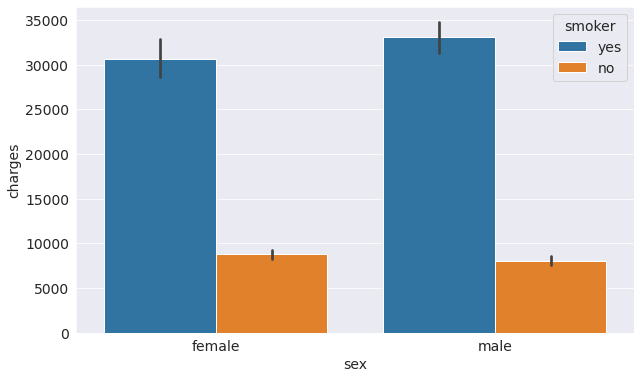

In [ ]:
sns.barplot(data = df,x = 'sex',y = 'charges',hue = "smoker")

In [ ]:
px.histogram(df,x='sex',y = 'charges',color = 'region')

In [ ]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


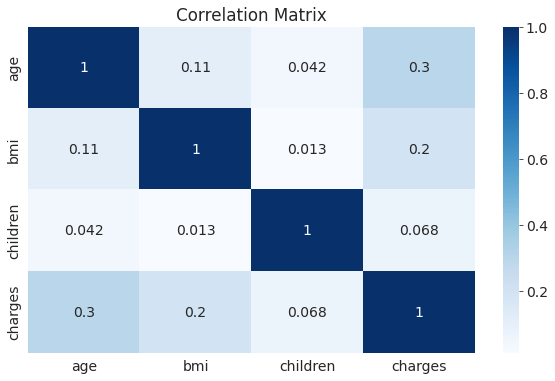

In [ ]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix');

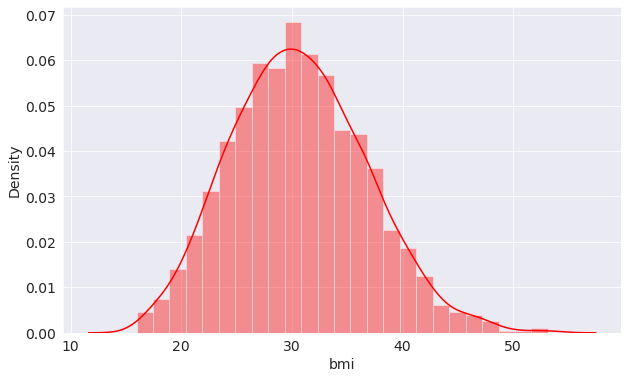

In [ ]:
## Analysing bmi

sns.distplot(df.bmi,color='red')

## Analysing children using count plot



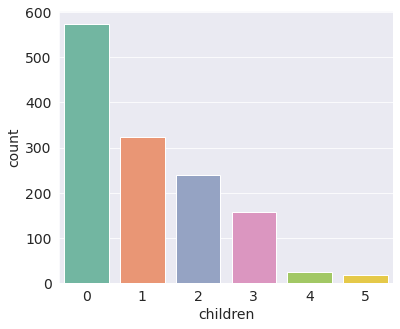

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='children',data=df,palette='Set2')
plt.show()

## Analysing smoker
## smoker vs non-smoker ratio 



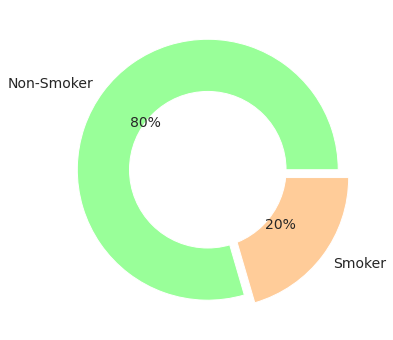

In [ ]:
labels=['Non-Smoker','Smoker']
size=df['smoker'].value_counts()
colors=['#99ff99','#ffcc99']
explode=(0,0.1)
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%2.f%%')
circle = plt.Circle( (0,0),0.6, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

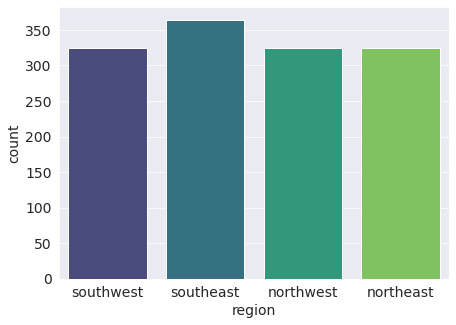

In [ ]:
## Analysing region using count plot

plt.figure(figsize=(7,5))
sns.countplot(x='region',data=df,palette='viridis')
plt.show()

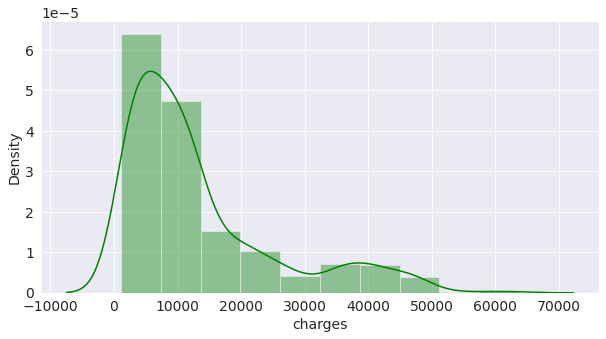

In [ ]:
## Analysing charges 

plt.figure(figsize=(10,5))
sns.distplot(df.charges,color='green',bins=10)
plt.show()

###Data Preparation and Preprocessing
Find Duplicated Value

In [ ]:
print('There are', df.duplicated().sum(), 'duplicated value')

There are 1 duplicated value


Find duplicated row

In [ ]:
df.loc[df.duplicated(keep = False), :]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


Drop Duplicate Row

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.loc[df.duplicated(keep = False), :]

,age,sex,bmi,children,smoker,region,charges


##Find Missing value

In [ ]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
missing_value_sum = df.isnull().sum()
print(missing_value_sum)
missing_value_percent = df.isnull().mean()*100
print(missing_value_percent)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64


##There no missing value

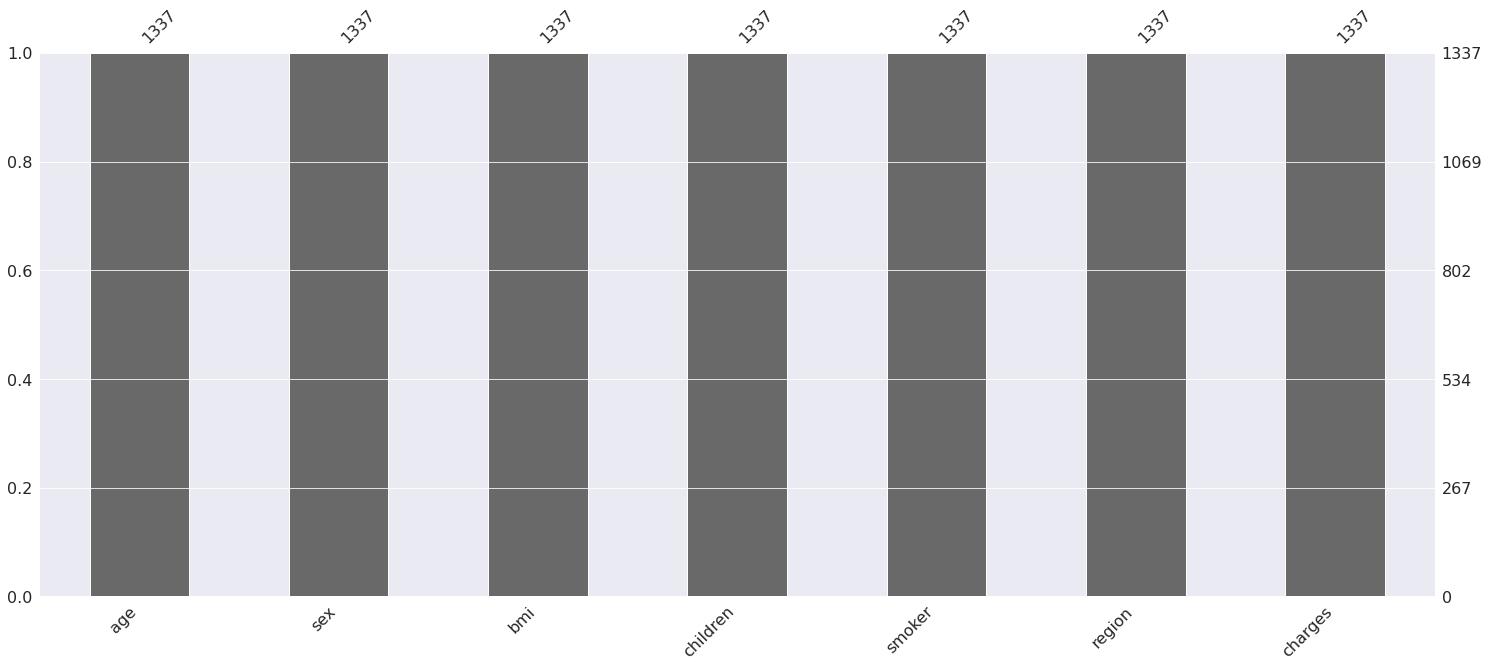

In [ ]:
import missingno as msno
msno.bar(df)

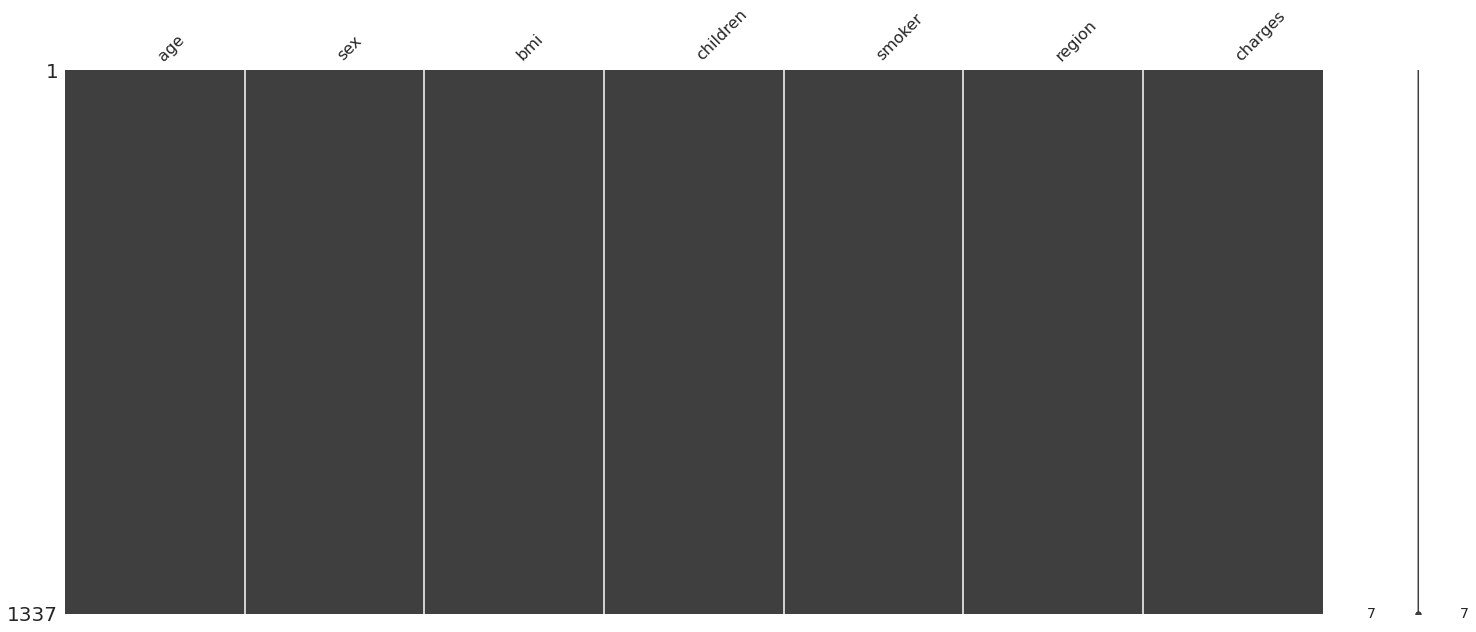

In [ ]:
msno.matrix(df)

##Methods for encoding
1. Ordinal Encoding
2. One-hot encoding
**We chose Ordinal Encoding

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df['sex'].describe()

count     1337
unique       2
top       male
freq       675
Name: sex, dtype: object

In [ ]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [ ]:
df['smoker'].describe()

count     1337
unique       2
top         no
freq      1063
Name: smoker, dtype: object

In [ ]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [ ]:
df['region'].describe()

count          1337
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.1 MB/s 


In [ ]:

import  category_encoders as ce ## Use odinal encoding to encode our column

In [ ]:
encoder = ce.OrdinalEncoder(mapping=[
    {'col': 'sex', 'mapping': {'male':1, 'female':2}},
    {'col': 'smoker', 'mapping': {'no':0, 'yes':1}},
    {'col': 'region', 'mapping': {'southeast':1, 'southwest':2, 'northwest':3, 'northeast':4}}
])

In [ ]:
encoded = encoder.fit_transform(df)

In [ ]:
df_pre = encoded

In [ ]:
df_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [ ]:
df_pre

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,2,31.920,0,0,4,2205.98080
1335,18,2,36.850,0,0,1,1629.83350
1336,21,2,25.800,0,0,2,2007.94500


In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df_pre.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [ ]:
df_pre['age'].mean()

39.222139117427076

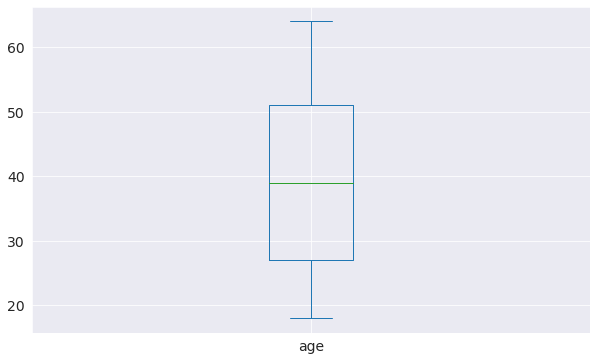

In [ ]:
df_pre['age'].plot.box()

In [ ]:
df_pre['charges'].mean()

13279.121486655948

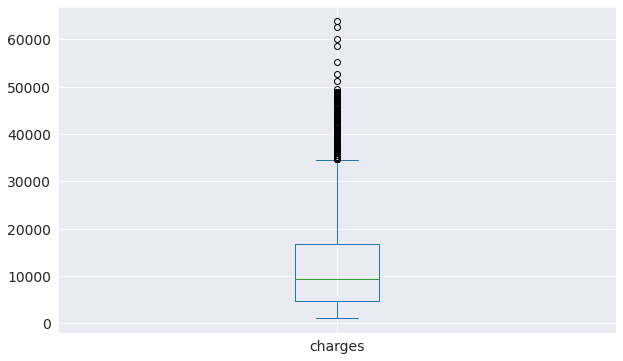

In [ ]:
df_pre['charges'].plot.box()

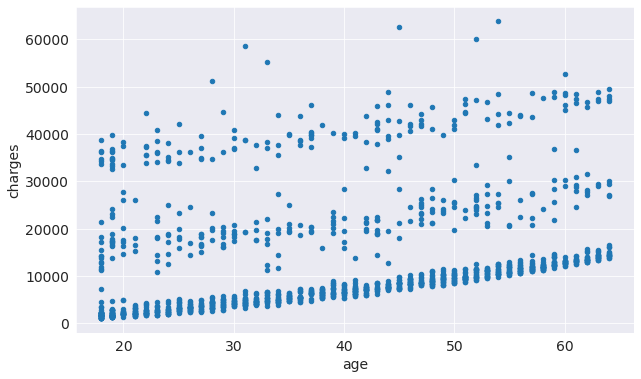

In [ ]:
df_pre.plot.scatter('age','charges')

In [ ]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
   
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls

In [ ]:
index_list = []
 
index_list.extend(outliers(df_pre, 'charges'))

index_list

[14,
 19,
 23,
 29,
 30,
 34,
 38,
 39,
 49,
 53,
 55,
 82,
 84,
 86,
 94,
 109,
 123,
 146,
 158,
 161,
 175,
 185,
 203,
 223,
 240,
 242,
 251,
 252,
 254,
 256,
 263,
 265,
 271,
 281,
 288,
 292,
 298,
 312,
 314,
 322,
 327,
 328,
 330,
 338,
 373,
 377,
 381,
 420,
 421,
 422,
 441,
 476,
 488,
 500,
 524,
 530,
 543,
 549,
 558,
 569,
 577,
 587,
 609,
 615,
 621,
 623,
 629,
 665,
 667,
 668,
 674,
 677,
 682,
 689,
 697,
 706,
 725,
 736,
 738,
 739,
 742,
 759,
 803,
 819,
 826,
 828,
 842,
 845,
 850,
 852,
 856,
 860,
 883,
 893,
 901,
 917,
 947,
 951,
 953,
 956,
 958,
 1012,
 1021,
 1022,
 1031,
 1036,
 1037,
 1047,
 1049,
 1062,
 1070,
 1078,
 1090,
 1096,
 1111,
 1117,
 1118,
 1122,
 1124,
 1139,
 1146,
 1152,
 1156,
 1186,
 1206,
 1207,
 1218,
 1230,
 1240,
 1241,
 1249,
 1284,
 1288,
 1291,
 1300,
 1301,
 1303,
 1313,
 1323]

In [ ]:
df_pre

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,2,31.920,0,0,4,2205.98080
1335,18,2,36.850,0,0,1,1629.83350
1336,21,2,25.800,0,0,2,2007.94500


In [ ]:
df_pre.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,1.495138,30.663452,1.095737,0.204936,2.454749,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.130521,12110.359656
min,18.000000,1.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,1.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,2.000000,34.700000,2.000000,0.000000,3.000000,16657.717450
max,64.000000,2.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


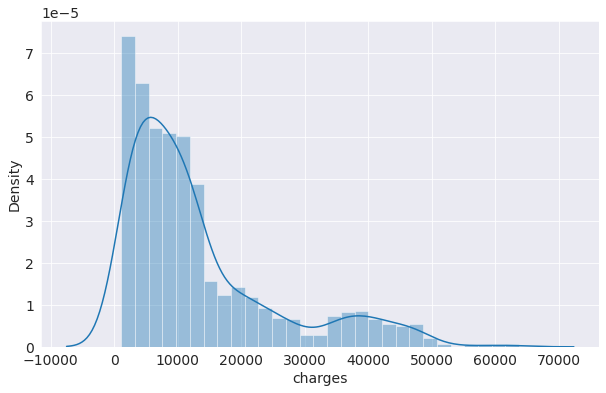

In [ ]:
sns.distplot(df_pre['charges'])

In [ ]:
df_pre

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,2,31.920,0,0,4,2205.98080
1335,18,2,36.850,0,0,1,1629.83350
1336,21,2,25.800,0,0,2,2007.94500


#Training

In [ ]:
X = df_pre.iloc[:, :-1]
y = df_pre.iloc[:, 6]

# col for testing 
columns = ['age','sex','bmi','children','smoker','region']

# split data into train and test set with 10% as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Linear Regression

In [ ]:
#train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# learned parameters
w0 = lr.coef_
w1 = lr.intercept_

## display information of model
print("========")
print('We obtained the model parameters as follow:')
print("w0: ", w0)
print("w1: ", w1)
print("========\n")

# make prediction with test set
y_predicted = lr.predict(X_test)

# calculat evaluation measures: mean square error, mean absolute r2-score
mse = metrics.mean_squared_error(y_test, y_predicted)
mae = metrics.mean_absolute_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("========")
print('Mean squared error: ', mse)
print('Mean absolute error: ', mae)
print('R2 score: ', r2)
print("========\n")

We obtained the model parameters as follow:
w0:  [3473.49538886   63.05394047 1971.51068466  481.42538863 9567.17655401
  472.90316033]
w1:  13192.54351989111

Mean squared error:  41090139.17718843
Mean absolute error:  4362.775720218624
R2 score:  0.7677834999026788



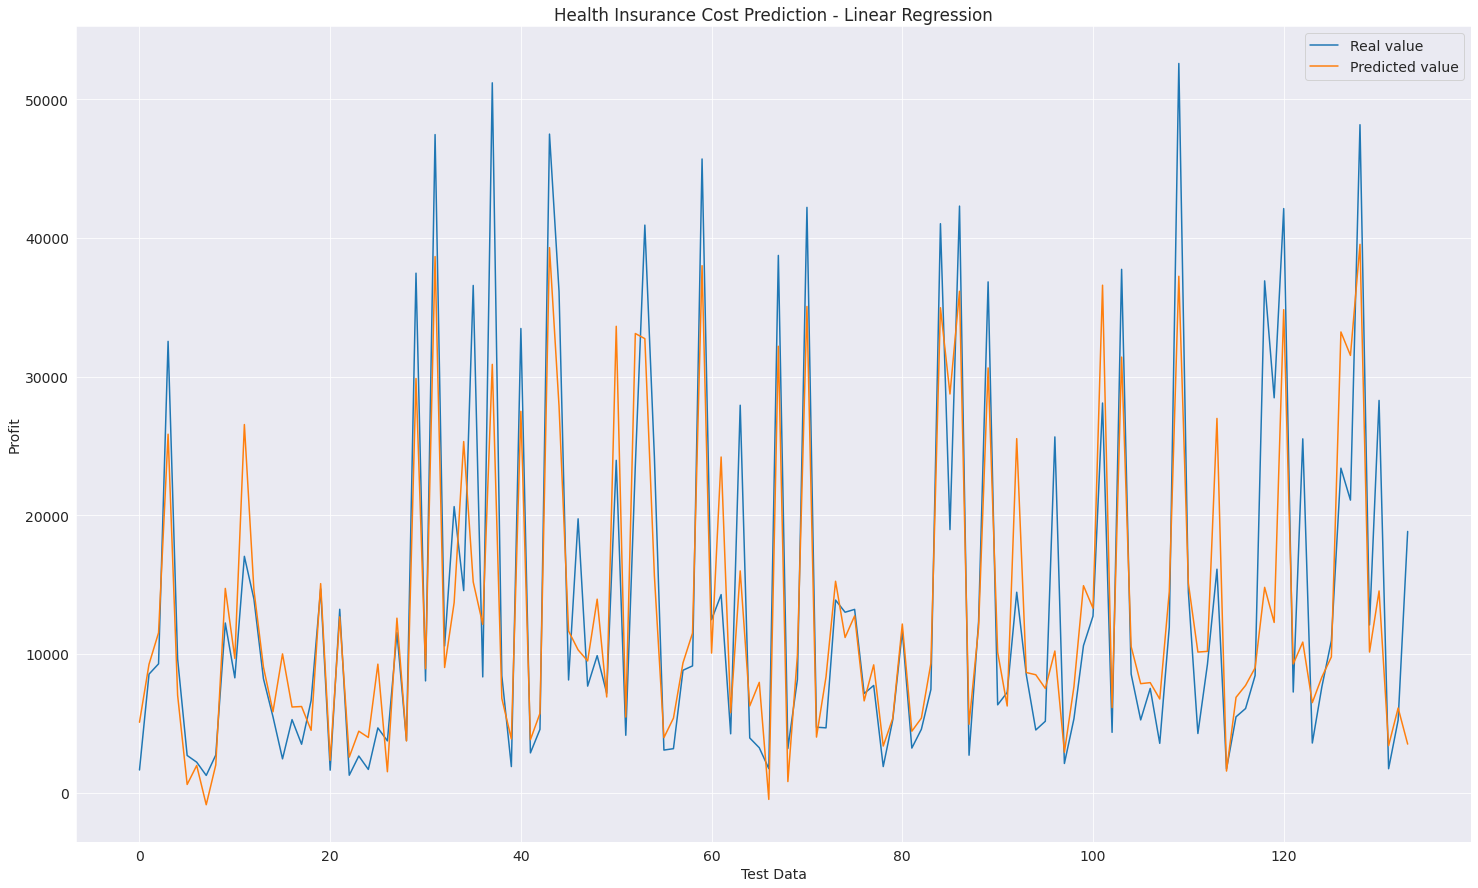

In [ ]:
# visualize the predicted value with real value
plt.figure(figsize=(25, 15))

plt.plot(y_test.values, label='Real value')
plt.plot(y_predicted, label='Predicted value')

plt.title('Health Insurance Cost Prediction - Linear Regression')
plt.xlabel('Test Data')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [ ]:
# prediction test
age = 18
sex = 2
bmi = 27
children = 1
smoker = 1 
region = 3

df_pre
client_information = [age,sex,bmi,children,smoker,region]
cost = lr.predict([client_information])

print('Clinet Information: \n')
for i,col in enumerate(X.columns):
    print(col," : ",client_information[i])
print('===========\n')
print('Cost: ', cost[0])

Clinet Information: 

age  :  18
sex  :  2
bmi  :  27
children  :  1
smoker  :  1
region  :  3

Cost:  140539.66830977


#Dicision Tree Regression

In [ ]:
#train model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Model prediction on test data
y_test_pred = dt.predict(X_test)

# calculat evaluation measures: mean square error, mean absolute r2-score
mse = metrics.mean_squared_error(y_test, y_test_pred)
mae = metrics.mean_absolute_error(y_test, y_test_pred)
r2 = metrics.r2_score(y_test, y_test_pred)

# Evaluation
print("========")
print('Mean squared error: ', mse)
print('Mean absolute error: ', mae)
print('R2 score: ', r2)
print("========\n")

Mean squared error:  37302293.52135602
Mean absolute error:  2764.007990223881
R2 score:  0.7891901020393434



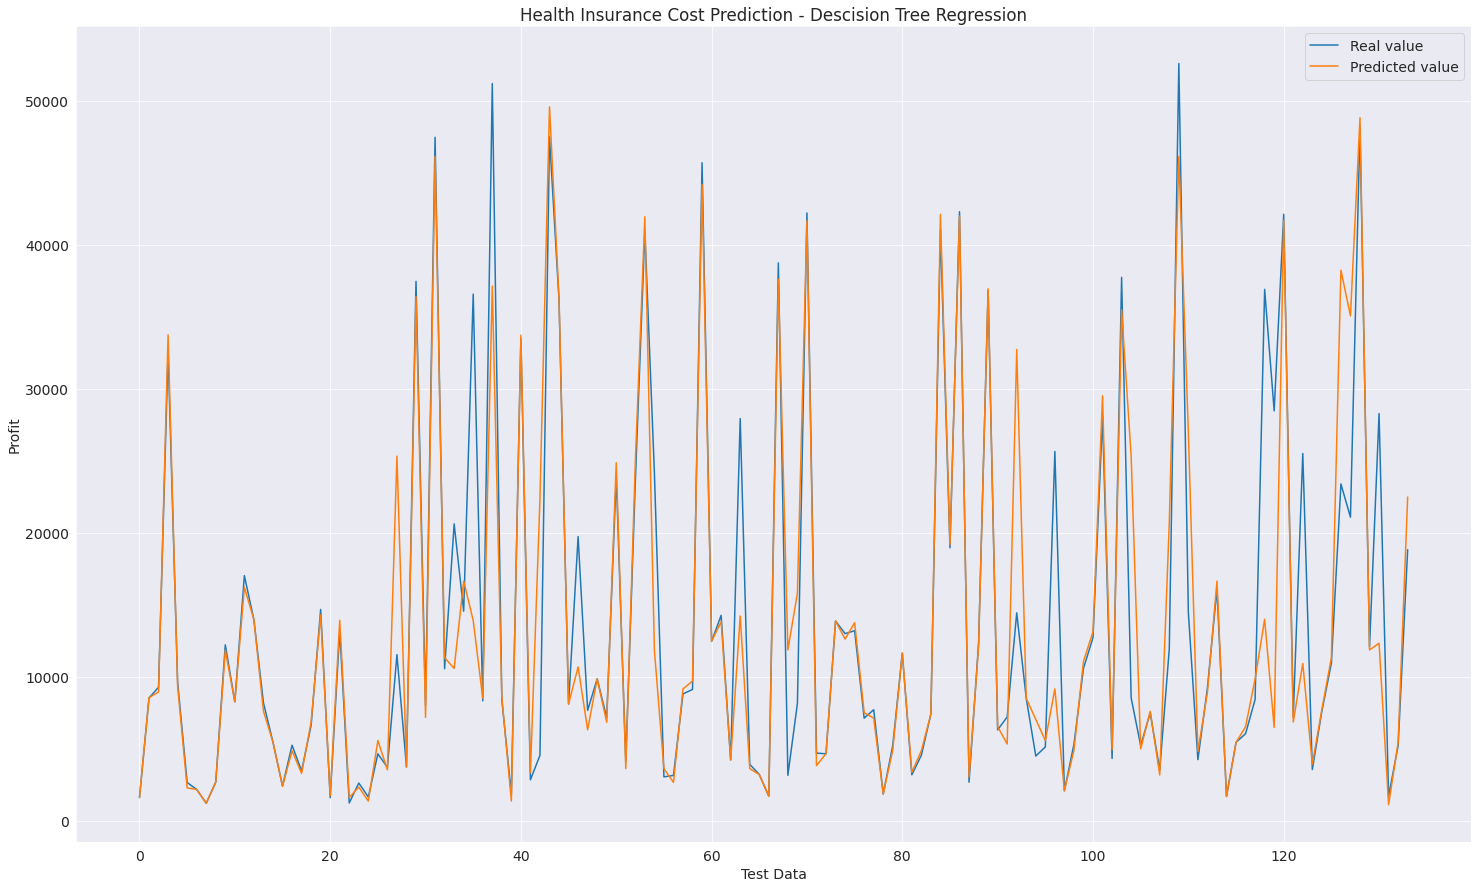

In [ ]:
# visualize the predicted value with real value
plt.figure(figsize=(25, 15))

plt.plot(y_test.values, label='Real value')
plt.plot(y_test_pred, label='Predicted value')

plt.title('Health Insurance Cost Prediction - Descision Tree Regression')
plt.xlabel('Test Data')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [ ]:
# prediction test
age = 18
sex = 2
bmi = 27
children = 1
smoker = 1 
region = 3

df_pre
client_information = [age,sex,bmi,children,smoker,region]
cost = dt.predict([client_information])

print('Clinet Information: \n')
for i,col in enumerate(X.columns):
    print(col," : ",client_information[i])
print('===========\n')
print('Cost: ', cost[0])

Clinet Information: 

age  :  18
sex  :  2
bmi  :  27
children  :  1
smoker  :  1
region  :  3

Cost:  63770.42801


#Random Forest

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

# Model prediction on test data
y_test_pred = rf.predict(X_test)

# calculat evaluation measures: mean square error, mean absolute r2-score
mse = metrics.mean_squared_error(y_test, y_test_pred)
mae = metrics.mean_absolute_error(y_test, y_test_pred)
r2 = metrics.r2_score(y_test, y_test_pred)

# Evaluation 
print("========")
print('Mean squared error: ', mse)
print('Mean absolute error: ', mae)
print('R2 score: ', r2)
print("========\n")

Mean squared error:  26677889.178224772
Mean absolute error:  2740.828102678158
R2 score:  0.8492327799563455



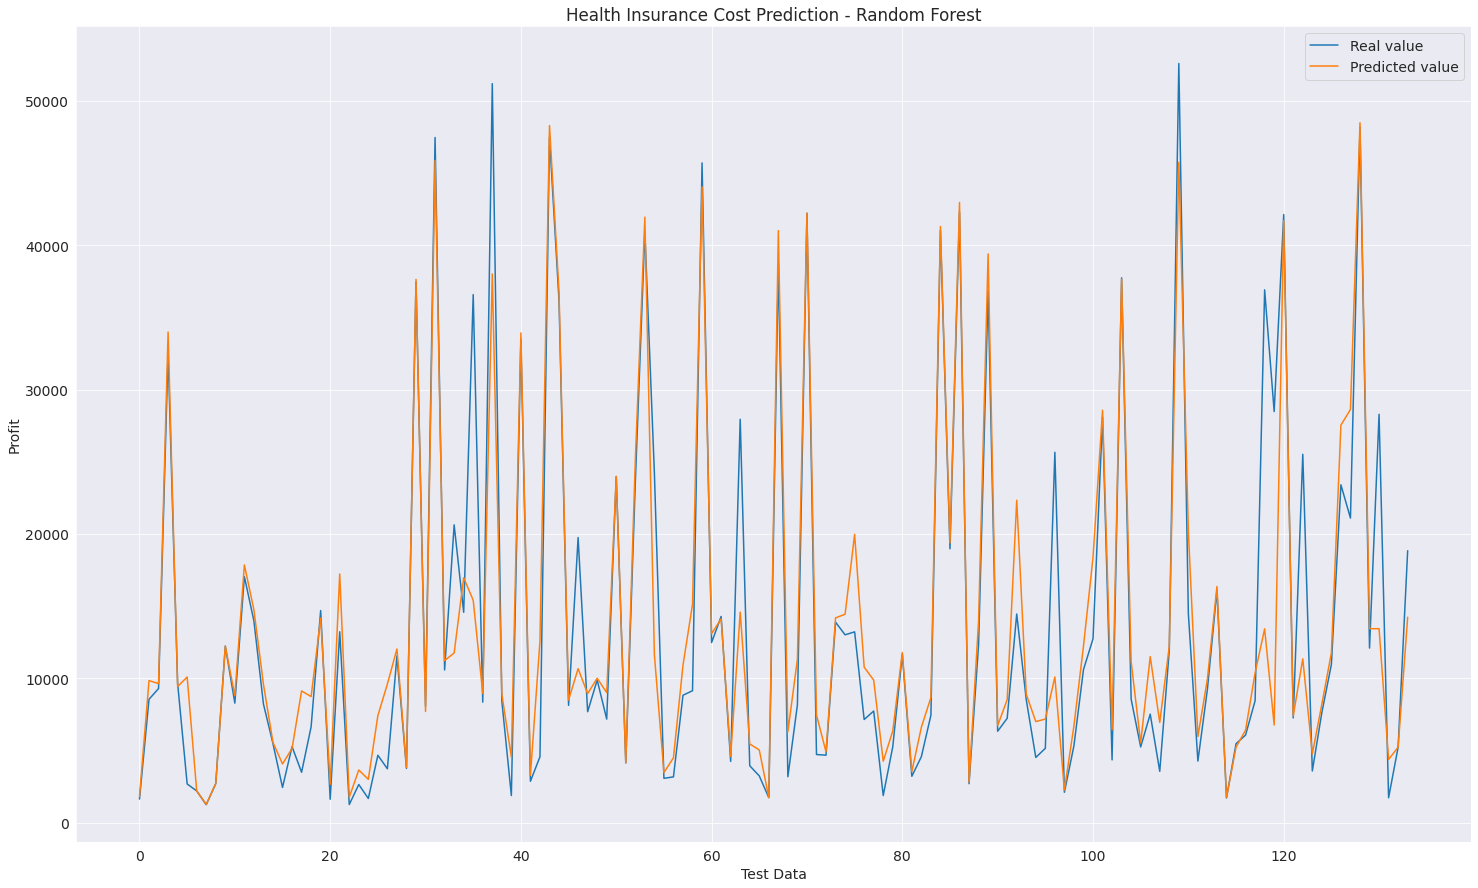

In [ ]:
# visualize the predicted value with real value
plt.figure(figsize=(25, 15))

plt.plot(y_test.values, label='Real value')
plt.plot(y_test_pred, label='Predicted value')

plt.title('Health Insurance Cost Prediction - Random Forest')
plt.xlabel('Test Data')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [ ]:
# prediction test
age = 18
sex = 2
bmi = 27
children = 1
smoker = 1 
region = 3

df_pre
client_information = [age,sex,bmi,children,smoker,region]
cost = rf.predict([client_information])

print('Clinet Information: \n')
for i,col in enumerate(X.columns):
    print(col," : ",client_information[i])
print('===========\n')
print('Cost: ', cost[0])

Clinet Information: 

age  :  18
sex  :  2
bmi  :  27
children  :  1
smoker  :  1
region  :  3

Cost:  57989.88698069994
